# Setup
First things first, we need to set up the notebook for our exercise today.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os


!git clone https://github.com/hamidatb/NeuroTune.git

# Constants / Global Settings
SampleRate = 256 # Amount of samples the muse records per second
plt.rcParams["figure.figsize"] = [30.00, 5.00] # Makes the plots a little wider

Cloning into 'NeuroTune'...
remote: Enumerating objects: 35118, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 35118 (delta 15), reused 54 (delta 9), pack-reused 35053 (from 1)
Receiving objects: 100% (35118/35118), 786.58 MiB | 16.86 MiB/s, done.
Resolving deltas: 100% (5950/5950), done.
Updating files: 100% (907/907), done.


# Step 1:
Open and Format

In [31]:
channel = []
filename = "NeuroTune/emotions_dataset/Happy/Brainwaves_Happy_15.csv"



with open(filename, "r") as data:
    for line in data:
        line = line.split(",")
        channel.append(float(line[1]))

<details>
  <summary>Solution</summary>

  ```
  channel = []
  filename = "/content/eo.csv"

  with open(filename, "r") as data:
      for line in data:
          line = line.split(",")
          channel.append(float(line[1]))
  ```
</details>

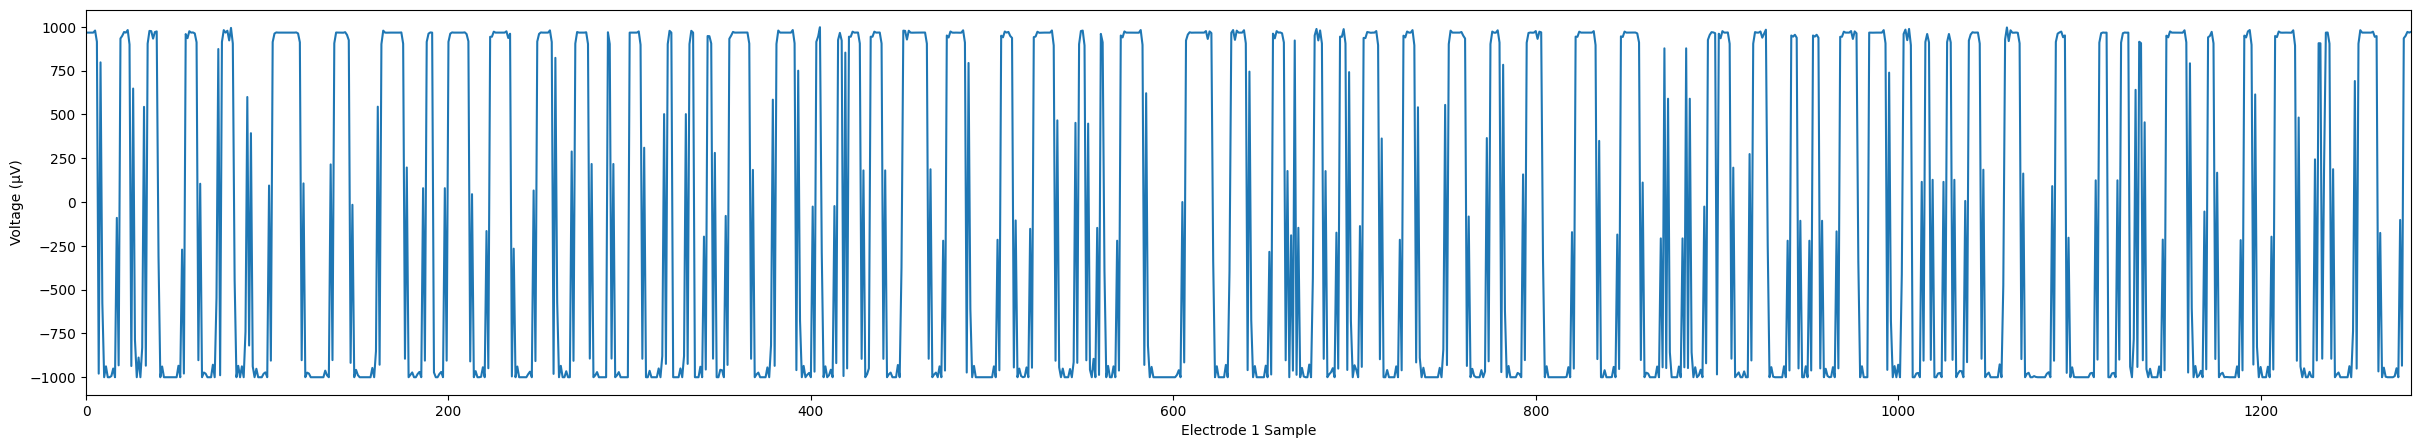

In [32]:
# Show a plot of the raw brainwave
time = np.arange(0, len(channel), 1)

plt.plot(time, channel)
plt.xlabel("Electrode 1 Sample")
plt.ylabel("Voltage (μV)")
plt.margins(x=0)
plt.show()

# Step 2:
Fast Fourier Transform

In [11]:
# Fourier transform
fftData = np.fft.fft(channel)
freq = np.fft.fftfreq(len(channel)) * SampleRate

# Now we just plot the transformed data (the exact same wave but in the frequency domain)
plotFreq    = freq[1:int(len(freq)/2)]                  # Remove negative reflection
plotFftData = fftData[1:int(len(fftData)/2)]            # Remove negative reflection
plotMag     = plotFftData.real**2 + plotFftData.imag**2 # FFT is a complex function, so we need to cast to the real domain

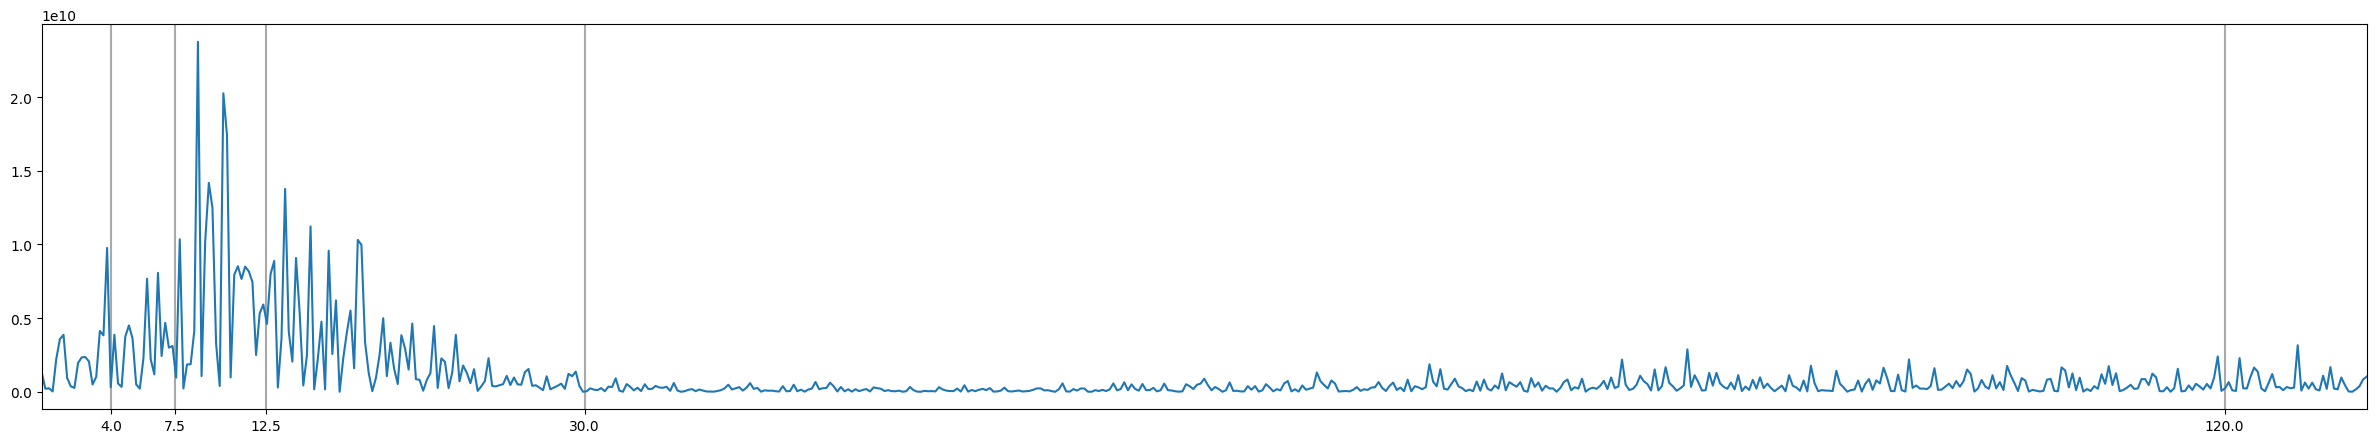

In [12]:
isShowingBinLines = True

# Create the plot
fig = plt.figure()
ax = fig.add_subplot()

# Add the special spacing
if(isShowingBinLines):
  subsets=[0, 4, 7.5, 12.5, 30, 120]
  ax.set_xticks(subsets)

# Add the vertical lines
if(isShowingBinLines):
  plt.axvline(x=4, color="darkgrey")
  plt.axvline(x=7.5, color="darkgrey")
  plt.axvline(x=12.5, color="darkgrey")
  plt.axvline(x=30, color="darkgrey")
  plt.axvline(x=120, color="darkgrey")

# Plot
ax.margins(x=0)
ax.plot(plotFreq, plotMag)
plt.show()

#Step 3:
Power Bins

In [13]:
# Bin the results
binsAverage = [0,0,0,0,0] # We will append to this later
binsTotal   = [0,0,0,0,0]
binsCount   = [0,0,0,0,0]

for point in range(len(plotFreq)):
  frequency = plotFreq[point]

  if(frequency < 4):      # Delta (0 - 4Hz)
    binsTotal[0] += plotMag[point]
    binsCount[0] += 1

  elif(frequency < 7.5):  # Theta (4 - 7.5Hz)
    binsTotal[1] += plotMag[point]
    binsCount[1] += 1

  elif(frequency < 12.5): # Alpha (7.5 - 12.5Hz)
    binsTotal[2] += plotMag[point]
    binsCount[2] += 1

  elif(frequency < 30):   # Beta  (12.5 - 30Hz)
    binsTotal[3] += plotMag[point]
    binsCount[3] += 1

  elif(frequency < 120):   # Gamma (30 - 120Hz)
    binsTotal[4] += plotMag[point]
    binsCount[4] += 1

# Compute the average for all of them
binsAverage = list(np.array(binsTotal)/np.array(binsCount))

print("Total:  ", binsTotal)
print("Count:  ", binsCount)
print("Average:", binsAverage)

Total:   [41290273565.92735, 51978650921.45774, 185478448720.93713, 209503368364.52448, 160493278390.72705]
Count:   [20, 17, 25, 88, 451]
Average: [2064513678.2963676, 3057567701.26222, 7419137948.837485, 2380720095.0514145, 355860927.69562536]


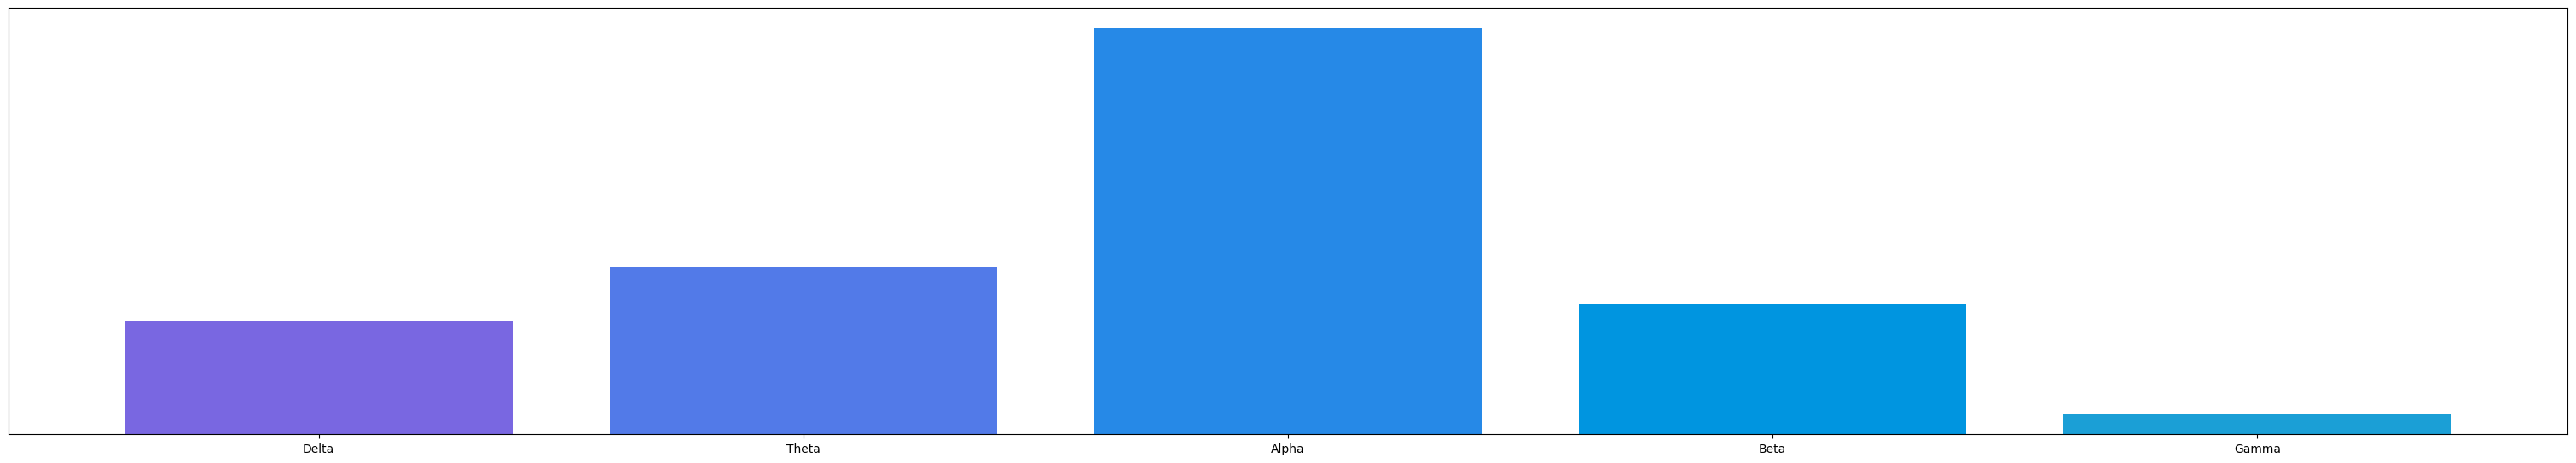

In [14]:
# Create the plot
fig = plt.figure()

# Hide the y axis
ax = fig.add_axes([0,0,1,1])
ax.get_yaxis().set_visible(False)

# Plot
binNames = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
ax.bar(binNames, binsAverage, color=['#7967e1', '#527ae8', '#2689e7', '#0095e0', '#1b9fd6'])
plt.show()

#Step 3.5
Here we are going to move all of what we've written above into a function that we can use to easily run everything on our data later!

In [17]:
def getPowerBinsFromFilename(filename):
  if(str(type(filename)) != "<class 'str'>"): # Error handling
    print("Error: filename must be a string.")
    return


  ## Open the data ##
  channel = []
  with open(filename, "r") as data:
    for line in data:
        line = line.split(",")
        channel.append(float(line[1]))


  ## Fourier transform the data ##
  fftData = np.fft.fft(channel)
  freq = np.fft.fftfreq(len(channel)) * SampleRate

  outFftData = fftData[1:int(len(fftData)/2)]
  outMag     = outFftData.real**2 + outFftData.imag**2
  outFreq    = freq[1:int(len(freq)/2)]


  ## Bin the data ##
  binsTotal   = [0,0,0,0,0]
  binsCount   = [0,0,0,0,0]

  for point in range(len(outFreq)):
    frequency = outFreq[point]

    if(frequency < 4):      # Delta (0 - 4Hz)
      binsTotal[0] += outMag[point]
      binsCount[0] += 1

    elif(frequency < 7.5):  # Theta (4 - 7.5Hz)
      binsTotal[1] += outMag[point]
      binsCount[1] += 1

    elif(frequency < 12.5): # Alpha (7.5 - 12.5Hz)
      binsTotal[2] += outMag[point]
      binsCount[2] += 1

    elif(frequency < 30):   # Beta  (12.5 - 30Hz)
      binsTotal[3] += outMag[point]
      binsCount[3] += 1

    elif(frequency < 120):   # Gamma (30 - 120Hz)
      binsTotal[4] += outMag[point]
      binsCount[4] += 1

    binsAverage = [total / count if count != 0 else 0 for total, count in zip(binsTotal, binsCount)]

  ## Finished computing the bins, return them ##
  return binsAverage




def showPlot(values, title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.title(title, loc='left')
    ax.get_yaxis().set_visible(False)

    binNames = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
    ax.bar(binNames, values, color=['#7967e1', '#527ae8', '#2689e7', '#0095e0', '#1b9fd6'])
    plt.show()




def showComparisonPlot(values):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.title("Comparison", loc='left')
    ax.get_yaxis().set_visible(False)

    binNames = ['Sample A', 'Sample B']
    ax.bar(binNames, values, color=['#7967e1', '#1b9fd6'])
    plt.show()

#Step 4:
Classify!

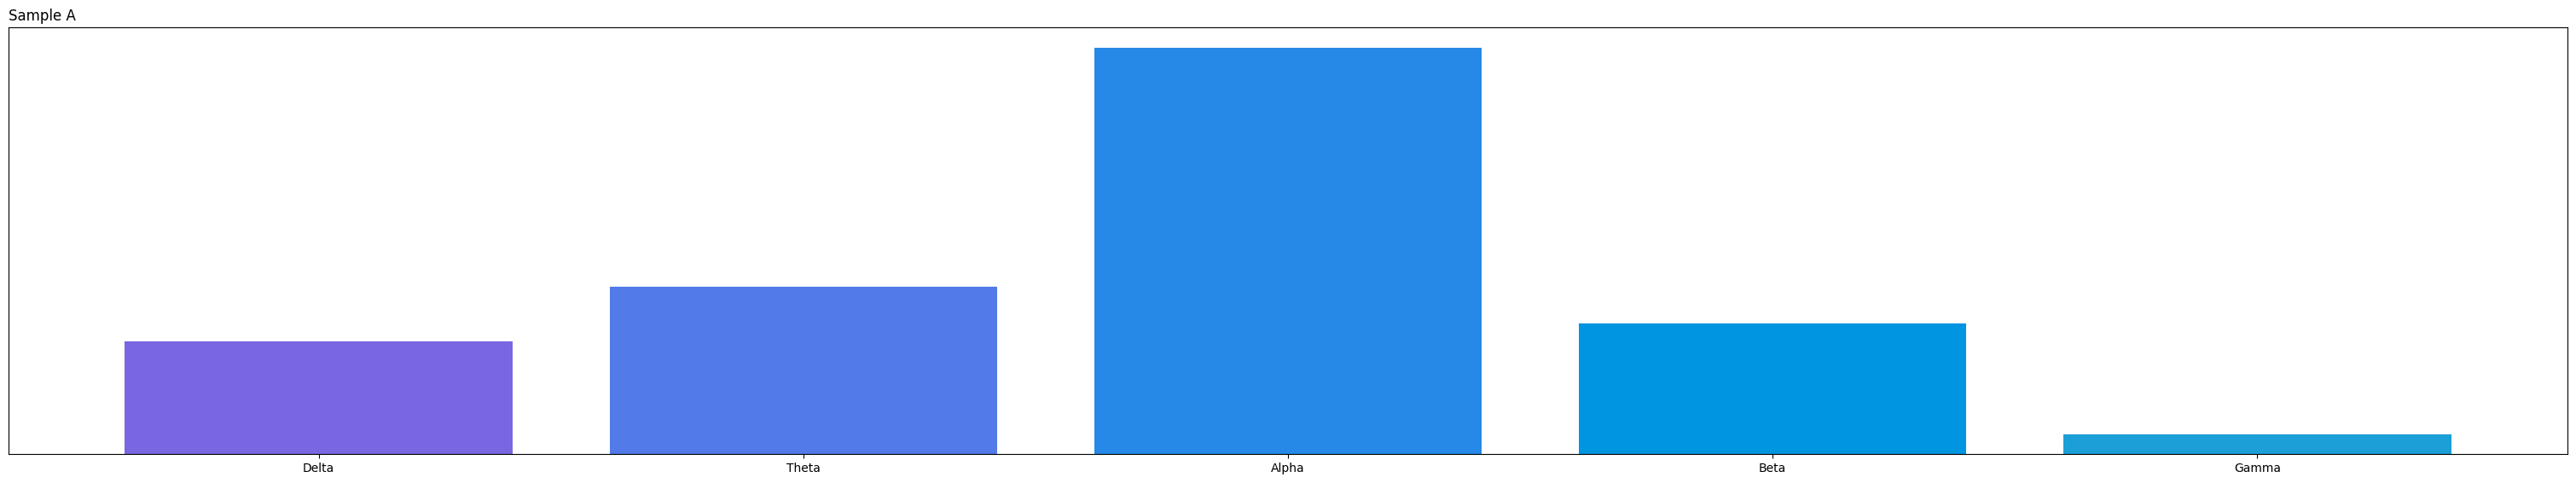

NameError: name 'binsB' is not defined

In [18]:
# Use our function to compute the bins
binsA = getPowerBinsFromFilename(filename)


# Plot out the bins calculated
showPlot(binsA, "Sample A")


# Grab the raw alpha bins (index = 2 is the alpha)
alphaBinA = binsA[2]

# Use the average magnitude of all bins to scale the output for fair comparison
scaleFactor = np.average(binsA) / np.average(binsB)
scaledAlphaBinA = alphaBinA
#scaledAlphaBinB = alphaBinB * scaleFactor # only scale B since the scale factor is relative to A

# Output the before and after scaling
print()
print("Raw Alpha:", alphaBinA)
print("Scaled Alpha:", scaledAlphaBinA)
print("Scale Factor:", scaleFactor)

# PREPROCESSING!!!!!!!!!!!!!!!!!!!!

In [19]:
import pandas as pd

def wave_to_df(bin, mood):
  wave_data = {
    "Delta" : bin[0],
    "Theta" : bin[1],
    "Alpha" : bin[2],
    "Beta" :  bin[3],
    "Gamma" : bin[4],
    "Mood" : mood
  }
  df = pd.DataFrame.from_dict([wave_data])
  return df
def append_to_df(df, bin, mood):
  wave_data = {
    "Delta" : bin[0],
    "Theta" : bin[1],
    "Alpha" : bin[2],
    "Beta" :  bin[3],
    "Gamma" : bin[4],
    "Mood" : mood
  }
  df_new = pd.DataFrame.from_dict([wave_data])
  frames = [df, df_new]
  df = pd.concat(frames)
  df = df.reset_index(drop=True)
  return df


def process_folder(folder_path, mood):
    # Initialize an empty DataFrame
    df = pd.DataFrame(columns=["Delta", "Theta", "Alpha", "Beta", "Gamma", "Mood"])

    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):  # Ensure only CSV files are processed
            file_path = os.path.join(folder_path, file_name)
            bins = getPowerBinsFromFilename(file_path)
            if df.empty:
                df = wave_to_df(bins, mood)
            else:
                df = append_to_df(df, bins, mood)

    return df


# Path to the folder
folder_path_happy = "NeuroTune/emotions_dataset/Happy"
folder_path_sad = "NeuroTune/emotions_dataset/Sad"
folder_path_angry = "NeuroTune/emotions_dataset/Angry"
folder_path_relaxed = "NeuroTune/emotions_dataset/Relaxed"

# Initialize an empty master DataFrame
master_df = pd.DataFrame(columns=["Delta", "Theta", "Alpha", "Beta", "Gamma", "Mood"])

# Process each folder and append results to the master DataFrame

for folder_path, mood in [
    (folder_path_happy, "Happy"),
    (folder_path_sad, "Sad"),
    (folder_path_angry, "Angry"),
    (folder_path_relaxed, "Relaxed"),
]:
    folder_df = process_folder(folder_path, mood)
    master_df = pd.concat([master_df, folder_df], ignore_index=True)

# Display the resulting DataFrame
print(master_df)




           Delta         Theta         Alpha          Beta         Gamma  \
0   1.802376e+09  4.356478e+09  7.573240e+09  2.682883e+09  2.760122e+08   
1   1.788298e+09  3.658885e+09  8.030243e+09  2.819433e+09  2.709374e+08   
2   9.276496e+05  4.976492e+05  3.710803e+05  8.049964e+05  8.051961e+04   
3   1.350392e+09  2.992033e+09  9.487467e+09  2.602161e+09  2.749572e+08   
4   1.192564e+09  2.296027e+09  1.180780e+10  2.107243e+09  2.669219e+08   
5   1.518889e+09  2.647388e+09  8.417230e+09  2.947980e+09  2.726779e+08   
6   2.064514e+09  3.057568e+09  7.419138e+09  2.380720e+09  3.558609e+08   
7   1.408489e+09  3.541564e+09  7.861407e+09  2.236630e+09  3.436866e+08   
8   1.741446e+09  3.047776e+09  9.741181e+09  2.432363e+09  2.736617e+08   
9   2.469516e+09  3.362230e+09  7.178312e+09  2.809536e+09  2.855441e+08   
10  1.082481e+07  3.882464e+05  2.538612e+05  9.419607e+05  1.040834e+05   
11  1.480226e+08  3.284862e+06  8.607868e+05  6.720782e+05  1.108530e+05   
12  9.388981

<ipython-input-19-4f8b174f083b>:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  master_df = pd.concat([master_df, folder_df], ignore_index=True)


# KAN!!!!!!!!!!!!!

In [20]:
!pip install pykan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 1.9 MB/s eta 0:00:00


In [21]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from kan import *
from kan.utils import create_dataset
from kan.utils import ex_round
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [101]:
#MOODS:
# Happy = 1
#Sad = 2
#Angry = 3
#Relaxed = 4

# Encode mood labels
label_encoder = LabelEncoder()
master_df['Mood'] = label_encoder.fit_transform(master_df['Mood'])

# Extract features (X) and target labels (y)
X = master_df[['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']].values
y = master_df['Mood'].values

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the training and test data using training data's statistics
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Normalize training data
X_test = scaler.transform(X_test)       # Normalize test data using same scaler

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create the dataset dictionary
dataset = {
    'train_input': X_train,
    'train_label': y_train,
    'test_input': X_test,
    'test_label': y_test
}

# Define model with 5 input units, 16 hidden layer1 units, 8 hidden layer2 units, and 4 output units
model = KAN(width=[5, 8, 4], grid=6, k=2, seed=42, device=device)



checkpoint directory created: ./model
saving model version 0.0


In [102]:
#train model with CrossEntropyLoss for classification (epoch 1)
#model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, loss_fn=torch.nn.CrossEntropyLoss())
#model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, loss_fn=torch.nn.CrossEntropyLoss())


#accuracy calculations
def train_acc():
    predictions = torch.argmax(model(dataset['train_input']), dim=1)
    return torch.mean((predictions == dataset['train_label']).float())

def test_acc():
    predictions = torch.argmax(model(dataset['test_input']), dim=1)
    return torch.mean((predictions == dataset['test_label']).float())

In [103]:
#train again, calculate accuracy metrics at each step
results = model.fit(dataset, opt="LBFGS", steps=100, lamb = 0.001, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
print("Final Train Accuracy:", results['train_acc'][-1])
print("Final Test Accuracy:", results['test_acc'][-1])

| train_loss: 2.97e-01 | test_loss: 2.37e+00 | reg: 9.24e+01 | : 100%|█| 100/100 [00:23<00:00,  4.33

saving model version 0.1
Final Train Accuracy: 0.9583333134651184
Final Test Accuracy: 0.5833333134651184


In [97]:
import itertools

param_grid = {
    "width": [[5, 16, 8, 4], [5, 12, 4], [5, 16, 16, 4], [5, 8, 4], [5, 6, 4]],  # Example architectures
    "grid": [3, 4, 5, 6],                   # Grid sizes to test
    "k": [2, 3, 4, 5],                      # Hyperparameter k values
    "lamb": [0, 0.001, 0.01, 0.1, 0.00001]             # Regularization lambda values
}

param_combinations = list(itertools.product(*param_grid.values()))

best_model = None
best_acc = 0
best_params = None
results = []  # To store results of all combinations

for params in param_combinations:
    # Extract parameters
    width, grid, k, lamb = params

    model = KAN(width=width, grid=grid, k=k, seed=42)
    model.fit(dataset, opt="Adam", steps=100, lamb=lamb, loss_fn=torch.nn.CrossEntropyLoss())
    acc = train_acc()
    results.append({"params": params, "accuracy": acc})

    if acc > best_acc:
        best_model = model
        best_acc = acc
        best_params = params

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_acc:.4f}")
for result in results:
    print(f"Params: {result['params']}, Accuracy: {result['accuracy']:.4f}")

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.67e-01 | test_loss: 9.63e-01 | reg: 1.73e+03 | : 100%|█| 100/100 [00:02<00:00, 45.92


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.10e-01 | test_loss: 9.63e-01 | reg: 3.84e+03 | : 100%|█| 100/100 [00:02<00:00, 33.72


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.36e-01 | test_loss: 1.74e+00 | reg: 1.51e+03 | : 100%|█| 100/100 [00:02<00:00, 41.62


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.25e+00 | test_loss: 1.19e+00 | reg: 1.62e+02 | : 100%|█| 100/100 [00:02<00:00, 43.21


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.40e-01 | test_loss: 8.58e-01 | reg: 3.51e+03 | : 100%|█| 100/100 [00:02<00:00, 40.30


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.90e+02 | test_loss: 2.12e+02 | reg: 3.44e+04 | : 100%|█| 100/100 [00:02<00:00, 41.67


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.27e+02 | test_loss: 3.68e+02 | reg: 4.72e+03 | : 100%|█| 100/100 [00:03<00:00, 29.69


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.41e+02 | test_loss: 4.39e+02 | reg: 1.46e+04 | : 100%|█| 100/100 [00:02<00:00, 38.66


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.25e+01 | test_loss: 1.41e+02 | reg: 1.86e+03 | : 100%|█| 100/100 [00:02<00:00, 38.60


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.40e+00 | test_loss: 5.82e+00 | reg: 7.57e+03 | : 100%|█| 100/100 [00:02<00:00, 38.25


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.14e+00 | test_loss: 9.31e-01 | reg: 5.33e+03 | : 100%|█| 100/100 [00:02<00:00, 37.37


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.00e+00 | test_loss: 1.02e+00 | reg: 1.49e+03 | : 100%|█| 100/100 [00:03<00:00, 30.46


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.22e+01 | test_loss: 1.76e+01 | reg: 4.44e+03 | : 100%|█| 100/100 [00:02<00:00, 34.63


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.12e+00 | test_loss: 1.19e+00 | reg: 8.02e+02 | : 100%|█| 100/100 [00:02<00:00, 35.50


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.05e+00 | test_loss: 1.06e+00 | reg: 6.36e+03 | : 100%|█| 100/100 [00:03<00:00, 30.24


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.92e+00 | test_loss: 1.31e+01 | reg: 1.07e+04 | : 100%|█| 100/100 [00:03<00:00, 31.19


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.84e+00 | test_loss: 1.88e+00 | reg: 4.81e+03 | : 100%|█| 100/100 [00:02<00:00, 33.40


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.02e+00 | test_loss: 9.52e-01 | reg: 4.07e+03 | : 100%|█| 100/100 [00:03<00:00, 32.76


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.77e+01 | test_loss: 1.42e+01 | reg: 2.50e+03 | : 100%|█| 100/100 [00:03<00:00, 29.82


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.58e+00 | test_loss: 3.55e+00 | reg: 3.33e+03 | : 100%|█| 100/100 [00:04<00:00, 22.10


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.18e-01 | test_loss: 1.13e+00 | reg: 2.62e+03 | : 100%|█| 100/100 [00:01<00:00, 53.90


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.55e-01 | test_loss: 1.06e+00 | reg: 1.66e+03 | : 100%|█| 100/100 [00:02<00:00, 40.32


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.77e-01 | test_loss: 9.87e-01 | reg: 7.58e+02 | : 100%|█| 100/100 [00:02<00:00, 41.47


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.20e+00 | test_loss: 1.18e+00 | reg: 2.16e+02 | : 100%|█| 100/100 [00:02<00:00, 35.33


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.93e-01 | test_loss: 2.87e+00 | reg: 1.95e+03 | : 100%|█| 100/100 [00:02<00:00, 35.23


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.11e+01 | test_loss: 3.88e+01 | reg: 5.27e+04 | : 100%|█| 100/100 [00:02<00:00, 49.01


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.14e+02 | test_loss: 3.00e+02 | reg: 1.62e+05 | : 100%|█| 100/100 [00:02<00:00, 38.56


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.73e+02 | test_loss: 4.41e+02 | reg: 4.09e+05 | : 100%|█| 100/100 [00:02<00:00, 38.34


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.29e+00 | test_loss: 9.13e+00 | reg: 5.85e+03 | : 100%|█| 100/100 [00:03<00:00, 31.61


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.37e+00 | test_loss: 1.36e+00 | reg: 5.30e+03 | : 100%|█| 100/100 [00:03<00:00, 32.04


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.25e+00 | test_loss: 1.55e+00 | reg: 4.71e+03 | : 100%|█| 100/100 [00:02<00:00, 42.67


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.71e+00 | test_loss: 1.36e+00 | reg: 3.10e+03 | : 100%|█| 100/100 [00:02<00:00, 33.68


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.09e+00 | test_loss: 1.17e+00 | reg: 2.11e+04 | : 100%|█| 100/100 [00:03<00:00, 31.63


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.09e+00 | test_loss: 1.11e+00 | reg: 9.05e+02 | : 100%|█| 100/100 [00:03<00:00, 27.22


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.59e+00 | test_loss: 7.86e+00 | reg: 2.70e+03 | : 100%|█| 100/100 [00:02<00:00, 33.47


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.46e-01 | test_loss: 8.63e-01 | reg: 2.19e+03 | : 100%|█| 100/100 [00:02<00:00, 39.14


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.87e+01 | test_loss: 2.69e+02 | reg: 6.93e+04 | : 100%|█| 100/100 [00:04<00:00, 24.88


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.60e+00 | test_loss: 1.89e+00 | reg: 5.54e+03 | : 100%|█| 100/100 [00:04<00:00, 22.48


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.64e+01 | test_loss: 6.20e+01 | reg: 1.22e+04 | : 100%|█| 100/100 [00:03<00:00, 31.93


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.16e+00 | test_loss: 1.14e+00 | reg: 4.69e+03 | : 100%|█| 100/100 [00:03<00:00, 31.45


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.09e-01 | test_loss: 1.55e+00 | reg: 2.02e+03 | : 100%|█| 100/100 [00:01<00:00, 52.04


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.22e+00 | test_loss: 1.14e+00 | reg: 3.16e+03 | : 100%|█| 100/100 [00:03<00:00, 32.90


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.57e+00 | test_loss: 1.44e+00 | reg: 2.91e+02 | : 100%|█| 100/100 [00:02<00:00, 35.23


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.18e+00 | test_loss: 1.35e+00 | reg: 1.68e+02 | : 100%|█| 100/100 [00:02<00:00, 39.13


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.46e+00 | test_loss: 4.53e+00 | reg: 2.13e+03 | : 100%|█| 100/100 [00:02<00:00, 38.35


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.24e+00 | test_loss: 2.58e+00 | reg: 5.14e+03 | : 100%|█| 100/100 [00:02<00:00, 46.87


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.89e+01 | test_loss: 5.98e+02 | reg: 5.24e+03 | : 100%|█| 100/100 [00:03<00:00, 25.38


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.73e+02 | test_loss: 4.72e+02 | reg: 4.84e+03 | : 100%|█| 100/100 [00:02<00:00, 35.61


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.55e+00 | test_loss: 1.81e+00 | reg: 5.87e+02 | : 100%|█| 100/100 [00:02<00:00, 36.14


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.26e+02 | test_loss: 8.86e+02 | reg: 9.01e+03 | : 100%|█| 100/100 [00:02<00:00, 36.76


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.92e-01 | test_loss: 1.08e+00 | reg: 3.51e+03 | : 100%|█| 100/100 [00:02<00:00, 37.37


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.39e-01 | test_loss: 1.01e+00 | reg: 2.43e+03 | : 100%|█| 100/100 [00:03<00:00, 27.51


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.02e+00 | test_loss: 1.08e+00 | reg: 2.61e+03 | : 100%|█| 100/100 [00:03<00:00, 33.24


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.10e+00 | test_loss: 1.23e+00 | reg: 5.74e+02 | : 100%|█| 100/100 [00:02<00:00, 34.28


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.01e+00 | test_loss: 1.18e+00 | reg: 2.50e+03 | : 100%|█| 100/100 [00:03<00:00, 29.74


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.10e+00 | test_loss: 1.12e+00 | reg: 1.94e+03 | : 100%|█| 100/100 [00:03<00:00, 29.43


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.21e+01 | test_loss: 3.71e+01 | reg: 5.13e+03 | : 100%|█| 100/100 [00:03<00:00, 28.58


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.12e+00 | test_loss: 1.11e+00 | reg: 3.22e+03 | : 100%|█| 100/100 [00:03<00:00, 30.84


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.74e+00 | test_loss: 1.86e+00 | reg: 3.48e+03 | : 100%|█| 100/100 [00:03<00:00, 26.10


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.72e+00 | test_loss: 2.47e+00 | reg: 2.72e+03 | : 100%|█| 100/100 [00:03<00:00, 26.03


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.96e-01 | test_loss: 1.20e+00 | reg: 2.85e+03 | : 100%|█| 100/100 [00:01<00:00, 51.36


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.96e-01 | test_loss: 1.89e+00 | reg: 2.57e+03 | : 100%|█| 100/100 [00:02<00:00, 36.72


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.01e+00 | test_loss: 1.54e+00 | reg: 2.89e+03 | : 100%|█| 100/100 [00:02<00:00, 39.41


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.18e+00 | test_loss: 1.21e+00 | reg: 6.05e+02 | : 100%|█| 100/100 [00:03<00:00, 30.03


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.10e+00 | test_loss: 1.65e+00 | reg: 2.02e+03 | : 100%|█| 100/100 [00:02<00:00, 37.90


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.87e+00 | test_loss: 7.16e+00 | reg: 3.43e+03 | : 100%|█| 100/100 [00:02<00:00, 46.95


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.20e+03 | test_loss: 5.99e+03 | reg: 6.71e+06 | : 100%|█| 100/100 [00:02<00:00, 36.87


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.67e+00 | test_loss: 7.37e+00 | reg: 5.68e+03 | : 100%|█| 100/100 [00:02<00:00, 38.47


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.51e+01 | test_loss: 2.77e+01 | reg: 3.34e+03 | : 100%|█| 100/100 [00:03<00:00, 27.40


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.63e+01 | test_loss: 4.27e+01 | reg: 6.43e+03 | : 100%|█| 100/100 [00:02<00:00, 35.18


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.40e-01 | test_loss: 1.04e+00 | reg: 3.58e+03 | : 100%|█| 100/100 [00:02<00:00, 39.68


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.98e+00 | test_loss: 1.43e+00 | reg: 3.67e+03 | : 100%|█| 100/100 [00:02<00:00, 33.43


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.02e+00 | test_loss: 1.06e+00 | reg: 1.87e+03 | : 100%|█| 100/100 [00:03<00:00, 28.64


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.01e+00 | test_loss: 1.50e+00 | reg: 3.08e+03 | : 100%|█| 100/100 [00:03<00:00, 29.98


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.85e+00 | test_loss: 3.17e+00 | reg: 2.56e+03 | : 100%|█| 100/100 [00:02<00:00, 34.37


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.01e+00 | test_loss: 1.03e+00 | reg: 2.04e+03 | : 100%|█| 100/100 [00:02<00:00, 36.74


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.00e+00 | test_loss: 9.96e-01 | reg: 1.79e+03 | : 100%|█| 100/100 [00:03<00:00, 27.19


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.19e+00 | test_loss: 2.19e+00 | reg: 2.84e+03 | : 100%|█| 100/100 [00:03<00:00, 27.13


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.12e+00 | test_loss: 9.74e-01 | reg: 9.81e+02 | : 100%|█| 100/100 [00:03<00:00, 30.48


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.79e+00 | test_loss: 2.15e+00 | reg: 2.84e+03 | : 100%|█| 100/100 [00:03<00:00, 30.39


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.65e+00 | test_loss: 2.82e+00 | reg: 1.01e+03 | : 100%|█| 100/100 [00:01<00:00, 67.83


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.33e-01 | test_loss: 1.18e+00 | reg: 5.56e+02 | : 100%|█| 100/100 [00:02<00:00, 43.44


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.09e+00 | test_loss: 1.20e+00 | reg: 3.14e+02 | : 100%|█| 100/100 [00:02<00:00, 48.74


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.16e+00 | test_loss: 1.17e+00 | reg: 2.32e+01 | : 100%|█| 100/100 [00:01<00:00, 56.81


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.19e+00 | test_loss: 2.28e+00 | reg: 7.24e+02 | : 100%|█| 100/100 [00:01<00:00, 57.05


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.73e+01 | test_loss: 2.75e+01 | reg: 2.67e+03 | : 100%|█| 100/100 [00:01<00:00, 69.80


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.77e+00 | test_loss: 1.64e+01 | reg: 1.04e+03 | : 100%|█| 100/100 [00:01<00:00, 53.35


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.45e+01 | test_loss: 1.37e+01 | reg: 2.75e+03 | : 100%|█| 100/100 [00:02<00:00, 49.77


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.49e+01 | test_loss: 9.25e+00 | reg: 7.95e+02 | : 100%|█| 100/100 [00:02<00:00, 36.16


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.30e+00 | test_loss: 1.72e+01 | reg: 2.20e+04 | : 100%|█| 100/100 [00:01<00:00, 50.66


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.94e+00 | test_loss: 2.38e+00 | reg: 1.00e+03 | : 100%|█| 100/100 [00:01<00:00, 60.13


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.10e+00 | test_loss: 1.97e+00 | reg: 1.42e+03 | : 100%|█| 100/100 [00:02<00:00, 49.28


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.26e+00 | test_loss: 5.51e+00 | reg: 3.16e+02 | : 100%|█| 100/100 [00:02<00:00, 49.35


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.61e+00 | test_loss: 1.06e+01 | reg: 3.71e+02 | : 100%|█| 100/100 [00:02<00:00, 49.69


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.63e+00 | test_loss: 2.61e+00 | reg: 9.58e+02 | : 100%|█| 100/100 [00:02<00:00, 37.29


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.50e+00 | test_loss: 1.66e+00 | reg: 8.50e+02 | : 100%|█| 100/100 [00:02<00:00, 44.82


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.00e+00 | test_loss: 6.37e+00 | reg: 2.32e+03 | : 100%|█| 100/100 [00:02<00:00, 46.00


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.89e-01 | test_loss: 1.05e+00 | reg: 4.16e+01 | : 100%|█| 100/100 [00:02<00:00, 43.26


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.53e+00 | test_loss: 8.92e+00 | reg: 6.12e+02 | : 100%|█| 100/100 [00:02<00:00, 46.37


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.11e-01 | test_loss: 1.03e+00 | reg: 8.79e+02 | : 100%|█| 100/100 [00:02<00:00, 45.00


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.16e+00 | test_loss: 3.04e+00 | reg: 5.92e+02 | : 100%|█| 100/100 [00:01<00:00, 52.86


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.59e-01 | test_loss: 2.74e+00 | reg: 9.30e+02 | : 100%|█| 100/100 [00:02<00:00, 42.12


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.07e-01 | test_loss: 1.12e+00 | reg: 2.30e+02 | : 100%|█| 100/100 [00:01<00:00, 57.30


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.16e+00 | test_loss: 1.18e+00 | reg: 3.33e+01 | : 100%|█| 100/100 [00:02<00:00, 45.53


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.78e-01 | test_loss: 2.17e+00 | reg: 9.46e+02 | : 100%|█| 100/100 [00:02<00:00, 42.73


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.91e+00 | test_loss: 7.63e+00 | reg: 8.63e+02 | : 100%|█| 100/100 [00:01<00:00, 65.20


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.91e+01 | test_loss: 1.59e+01 | reg: 1.64e+03 | : 100%|█| 100/100 [00:02<00:00, 49.21


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.96e+00 | test_loss: 4.46e+00 | reg: 1.35e+03 | : 100%|█| 100/100 [00:02<00:00, 38.54


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.94e+01 | test_loss: 1.72e+01 | reg: 2.91e+03 | : 100%|█| 100/100 [00:02<00:00, 45.30


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.25e+00 | test_loss: 1.48e+01 | reg: 1.30e+03 | : 100%|█| 100/100 [00:01<00:00, 53.05


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.06e+00 | test_loss: 8.67e+00 | reg: 7.91e+02 | : 100%|█| 100/100 [00:01<00:00, 61.59


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.14e+01 | test_loss: 1.15e+01 | reg: 1.22e+03 | : 100%|█| 100/100 [00:02<00:00, 44.99


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.24e+00 | test_loss: 6.08e+00 | reg: 6.01e+02 | : 100%|█| 100/100 [00:02<00:00, 48.31


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.18e+00 | test_loss: 1.87e+00 | reg: 3.03e+02 | : 100%|█| 100/100 [00:02<00:00, 39.46


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.18e+01 | test_loss: 7.73e+00 | reg: 1.46e+03 | : 100%|█| 100/100 [00:02<00:00, 38.30


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.27e+00 | test_loss: 1.17e+00 | reg: 1.07e+03 | : 100%|█| 100/100 [00:01<00:00, 51.51


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.13e+01 | test_loss: 2.61e+01 | reg: 1.78e+03 | : 100%|█| 100/100 [00:02<00:00, 45.67


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.39e+00 | test_loss: 1.90e+00 | reg: 2.39e+02 | : 100%|█| 100/100 [00:02<00:00, 45.10


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.66e+00 | test_loss: 2.43e+00 | reg: 3.16e+02 | : 100%|█| 100/100 [00:02<00:00, 43.98


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.03e+00 | test_loss: 2.15e+00 | reg: 6.76e+02 | : 100%|█| 100/100 [00:03<00:00, 30.83


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.23e+00 | test_loss: 5.80e+00 | reg: 1.48e+03 | : 100%|█| 100/100 [00:01<00:00, 63.15


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.22e+00 | test_loss: 2.52e+00 | reg: 1.51e+03 | : 100%|█| 100/100 [00:01<00:00, 52.65


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.58e+00 | test_loss: 4.96e+00 | reg: 6.81e+02 | : 100%|█| 100/100 [00:01<00:00, 56.58


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.00e+00 | test_loss: 9.96e-01 | reg: 3.76e+01 | : 100%|█| 100/100 [00:01<00:00, 54.99


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.99e-01 | test_loss: 7.00e+00 | reg: 1.66e+03 | : 100%|█| 100/100 [00:01<00:00, 56.83


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.94e+01 | test_loss: 1.87e+01 | reg: 2.56e+03 | : 100%|█| 100/100 [00:01<00:00, 59.44


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.77e+00 | test_loss: 1.03e+01 | reg: 2.34e+03 | : 100%|█| 100/100 [00:02<00:00, 38.90


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.90e+01 | test_loss: 2.04e+01 | reg: 1.13e+03 | : 100%|█| 100/100 [00:02<00:00, 44.52


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.85e+00 | test_loss: 7.99e+00 | reg: 4.68e+02 | : 100%|█| 100/100 [00:02<00:00, 49.26


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.56e+01 | test_loss: 2.77e+01 | reg: 2.71e+03 | : 100%|█| 100/100 [00:01<00:00, 50.96


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.53e+01 | test_loss: 2.75e+01 | reg: 2.58e+03 | : 100%|█| 100/100 [00:01<00:00, 58.04


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.84e+00 | test_loss: 2.69e+00 | reg: 1.60e+03 | : 100%|█| 100/100 [00:02<00:00, 48.63


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.36e+00 | test_loss: 1.03e+01 | reg: 6.13e+02 | : 100%|█| 100/100 [00:02<00:00, 40.21


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.66e+00 | test_loss: 3.15e+00 | reg: 1.16e+02 | : 100%|█| 100/100 [00:02<00:00, 36.71


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.47e+00 | test_loss: 2.37e+00 | reg: 2.23e+03 | : 100%|█| 100/100 [00:02<00:00, 45.55


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.55e+01 | test_loss: 2.33e+01 | reg: 1.30e+03 | : 100%|█| 100/100 [00:01<00:00, 52.17


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.23e+00 | test_loss: 4.25e+00 | reg: 1.00e+03 | : 100%|█| 100/100 [00:02<00:00, 44.83


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.10e+00 | test_loss: 4.26e+00 | reg: 6.73e+02 | : 100%|█| 100/100 [00:02<00:00, 42.36


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.03e+01 | test_loss: 2.75e+01 | reg: 1.11e+03 | : 100%|█| 100/100 [00:02<00:00, 33.86


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.63e+00 | test_loss: 3.99e+00 | reg: 2.19e+03 | : 100%|█| 100/100 [00:02<00:00, 38.31


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.74e-01 | test_loss: 3.51e+00 | reg: 1.35e+03 | : 100%|█| 100/100 [00:01<00:00, 71.55


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.53e-01 | test_loss: 1.16e+01 | reg: 1.74e+03 | : 100%|█| 100/100 [00:01<00:00, 55.38


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.36e+00 | test_loss: 2.37e+00 | reg: 4.02e+02 | : 100%|█| 100/100 [00:01<00:00, 56.30


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.72e-01 | test_loss: 2.47e+00 | reg: 2.00e+02 | : 100%|█| 100/100 [00:01<00:00, 54.59


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.63e-01 | test_loss: 5.18e+00 | reg: 1.34e+03 | : 100%|█| 100/100 [00:02<00:00, 49.64


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.44e+01 | test_loss: 3.34e+01 | reg: 2.82e+03 | : 100%|█| 100/100 [00:02<00:00, 48.97


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.20e+01 | test_loss: 2.04e+01 | reg: 1.00e+03 | : 100%|█| 100/100 [00:02<00:00, 42.26


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.46e+00 | test_loss: 5.19e+00 | reg: 1.04e+03 | : 100%|█| 100/100 [00:02<00:00, 49.18


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.40e+01 | test_loss: 2.77e+01 | reg: 1.04e+03 | : 100%|█| 100/100 [00:01<00:00, 51.06


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.87e+01 | test_loss: 5.01e+01 | reg: 2.56e+03 | : 100%|█| 100/100 [00:02<00:00, 49.14


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.24e+00 | test_loss: 7.08e+00 | reg: 1.06e+03 | : 100%|█| 100/100 [00:01<00:00, 52.48


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.74e+00 | test_loss: 5.53e+00 | reg: 2.53e+03 | : 100%|█| 100/100 [00:02<00:00, 39.11


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.17e+01 | test_loss: 1.15e+01 | reg: 1.38e+03 | : 100%|█| 100/100 [00:02<00:00, 34.26


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.44e+00 | test_loss: 9.69e+00 | reg: 3.61e+02 | : 100%|█| 100/100 [00:02<00:00, 46.76


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.36e+01 | test_loss: 5.94e+00 | reg: 1.99e+03 | : 100%|█| 100/100 [00:02<00:00, 45.50


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.08e+01 | test_loss: 1.82e+01 | reg: 1.47e+03 | : 100%|█| 100/100 [00:02<00:00, 49.33


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.07e+00 | test_loss: 2.47e+00 | reg: 5.91e+02 | : 100%|█| 100/100 [00:02<00:00, 42.69


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.29e+01 | test_loss: 1.10e+01 | reg: 1.15e+03 | : 100%|█| 100/100 [00:03<00:00, 32.07


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.81e+02 | test_loss: 5.06e+02 | reg: 5.75e+04 | : 100%|█| 100/100 [00:02<00:00, 38.45


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.97e+01 | test_loss: 3.49e+01 | reg: 2.17e+03 | : 100%|█| 100/100 [00:02<00:00, 42.26


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.80e+00 | test_loss: 4.80e+00 | reg: 3.49e+03 | : 100%|█| 100/100 [00:02<00:00, 45.32


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.39e+00 | test_loss: 1.80e+00 | reg: 3.46e+03 | : 100%|█| 100/100 [00:02<00:00, 36.56


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.62e-01 | test_loss: 1.31e+00 | reg: 1.27e+03 | : 100%|█| 100/100 [00:03<00:00, 29.20


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.33e+00 | test_loss: 1.70e+00 | reg: 1.30e+02 | : 100%|█| 100/100 [00:03<00:00, 32.74


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.58e-01 | test_loss: 1.23e+00 | reg: 1.87e+03 | : 100%|█| 100/100 [00:02<00:00, 36.32


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.82e+01 | test_loss: 4.85e+01 | reg: 2.43e+04 | : 100%|█| 100/100 [00:02<00:00, 41.09


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.23e+02 | test_loss: 1.61e+02 | reg: 3.65e+03 | : 100%|█| 100/100 [00:03<00:00, 28.58


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.46e+02 | test_loss: 2.18e+03 | reg: 3.03e+04 | : 100%|█| 100/100 [00:03<00:00, 25.45


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.31e+03 | test_loss: 2.24e+03 | reg: 1.08e+06 | : 100%|█| 100/100 [00:02<00:00, 33.44


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.68e+02 | test_loss: 1.60e+02 | reg: 6.98e+03 | : 100%|█| 100/100 [00:03<00:00, 32.44


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.57e+00 | test_loss: 3.35e+00 | reg: 1.54e+03 | : 100%|█| 100/100 [00:02<00:00, 37.28


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.13e+01 | test_loss: 2.95e+01 | reg: 4.68e+03 | : 100%|█| 100/100 [00:04<00:00, 24.46


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.69e+02 | test_loss: 2.73e+02 | reg: 2.29e+04 | : 100%|█| 100/100 [00:03<00:00, 31.63


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.19e+00 | test_loss: 1.37e+00 | reg: 7.32e+02 | : 100%|█| 100/100 [00:03<00:00, 30.84


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.52e+00 | test_loss: 4.07e+00 | reg: 1.70e+03 | : 100%|█| 100/100 [00:03<00:00, 29.12


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.39e+02 | test_loss: 4.83e+02 | reg: 1.58e+05 | : 100%|█| 100/100 [00:03<00:00, 28.82


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.35e+01 | test_loss: 1.21e+02 | reg: 2.61e+04 | : 100%|█| 100/100 [00:03<00:00, 28.69


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.07e+01 | test_loss: 1.42e+01 | reg: 2.04e+03 | : 100%|█| 100/100 [00:04<00:00, 23.26


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.94e+00 | test_loss: 5.40e+00 | reg: 1.86e+03 | : 100%|█| 100/100 [00:04<00:00, 20.06


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.40e+00 | test_loss: 3.31e+00 | reg: 8.94e+03 | : 100%|█| 100/100 [00:03<00:00, 26.98


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.21e+00 | test_loss: 1.72e+00 | reg: 1.83e+03 | : 100%|█| 100/100 [00:02<00:00, 47.38


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.13e-01 | test_loss: 9.15e-01 | reg: 1.43e+03 | : 100%|█| 100/100 [00:02<00:00, 35.21


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.36e+00 | test_loss: 7.73e-01 | reg: 1.76e+03 | : 100%|█| 100/100 [00:03<00:00, 28.34


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.43e+00 | test_loss: 1.63e+00 | reg: 1.02e+02 | : 100%|█| 100/100 [00:02<00:00, 33.92


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.34e-01 | test_loss: 1.16e+00 | reg: 2.33e+03 | : 100%|█| 100/100 [00:02<00:00, 36.32


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.85e+02 | test_loss: 1.79e+02 | reg: 7.87e+03 | : 100%|█| 100/100 [00:02<00:00, 42.70


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.48e+02 | test_loss: 1.95e+02 | reg: 4.74e+03 | : 100%|█| 100/100 [00:03<00:00, 28.96


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.14e+02 | test_loss: 9.00e+01 | reg: 6.66e+03 | : 100%|█| 100/100 [00:03<00:00, 26.73


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.64e+01 | test_loss: 7.63e+01 | reg: 5.47e+03 | : 100%|█| 100/100 [00:03<00:00, 31.61


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.31e+02 | test_loss: 1.51e+02 | reg: 7.77e+03 | : 100%|█| 100/100 [00:03<00:00, 32.20


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.87e+01 | test_loss: 1.60e+01 | reg: 2.83e+03 | : 100%|█| 100/100 [00:02<00:00, 35.72


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.83e+01 | test_loss: 6.27e+01 | reg: 1.77e+04 | : 100%|█| 100/100 [00:04<00:00, 24.58


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.84e+01 | test_loss: 4.03e+01 | reg: 4.10e+03 | : 100%|█| 100/100 [00:03<00:00, 31.10


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.36e+00 | test_loss: 1.52e+00 | reg: 2.18e+03 | : 100%|█| 100/100 [00:03<00:00, 31.71


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.53e+00 | test_loss: 1.37e+00 | reg: 2.60e+03 | : 100%|█| 100/100 [00:03<00:00, 27.05


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.22e+02 | test_loss: 4.29e+02 | reg: 7.26e+03 | : 100%|█| 100/100 [00:03<00:00, 29.06


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.07e+00 | test_loss: 1.06e+00 | reg: 1.03e+04 | : 100%|█| 100/100 [00:03<00:00, 28.44


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.33e+00 | test_loss: 1.35e+00 | reg: 2.76e+04 | : 100%|█| 100/100 [00:03<00:00, 27.97


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.90e+00 | test_loss: 1.03e+01 | reg: 2.78e+03 | : 100%|█| 100/100 [00:04<00:00, 22.90


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.70e+03 | test_loss: 1.22e+03 | reg: 4.12e+05 | : 100%|█| 100/100 [00:03<00:00, 26.46


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.18e-01 | test_loss: 1.99e+00 | reg: 2.61e+03 | : 100%|█| 100/100 [00:02<00:00, 47.67


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.01e+00 | test_loss: 1.71e+00 | reg: 2.94e+03 | : 100%|█| 100/100 [00:02<00:00, 36.45


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.52e-01 | test_loss: 8.97e-01 | reg: 1.18e+03 | : 100%|█| 100/100 [00:02<00:00, 34.24


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.40e+00 | test_loss: 2.84e+00 | reg: 4.58e+02 | : 100%|█| 100/100 [00:03<00:00, 29.22


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.03e+00 | test_loss: 1.06e+00 | reg: 2.55e+03 | : 100%|█| 100/100 [00:02<00:00, 36.73


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.92e-01 | test_loss: 4.82e+01 | reg: 6.08e+03 | : 100%|█| 100/100 [00:02<00:00, 43.96


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.73e+04 | test_loss: 1.16e+05 | reg: 4.94e+06 | : 100%|█| 100/100 [00:02<00:00, 33.48


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.72e+00 | test_loss: 8.76e+01 | reg: 4.39e+06 | : 100%|█| 100/100 [00:03<00:00, 25.69


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.54e+02 | test_loss: 9.86e+02 | reg: 2.30e+04 | : 100%|█| 100/100 [00:03<00:00, 31.17


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.30e+02 | test_loss: 3.95e+02 | reg: 2.38e+04 | : 100%|█| 100/100 [00:03<00:00, 32.53


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.95e-01 | test_loss: 1.13e+00 | reg: 3.14e+03 | : 100%|█| 100/100 [00:02<00:00, 36.66


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.10e+00 | test_loss: 9.09e+00 | reg: 8.14e+03 | : 100%|█| 100/100 [00:04<00:00, 23.10


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.29e+00 | test_loss: 5.44e+00 | reg: 2.99e+03 | : 100%|█| 100/100 [00:03<00:00, 29.61


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.09e+01 | test_loss: 1.03e+01 | reg: 3.00e+03 | : 100%|█| 100/100 [00:03<00:00, 31.05


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.54e+01 | test_loss: 1.31e+02 | reg: 1.89e+04 | : 100%|█| 100/100 [00:03<00:00, 30.61


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.85e+00 | test_loss: 1.60e+00 | reg: 3.49e+04 | : 100%|█| 100/100 [00:03<00:00, 25.06


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.18e+00 | test_loss: 1.18e+00 | reg: 1.09e+04 | : 100%|█| 100/100 [00:03<00:00, 27.47


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.03e+00 | test_loss: 2.28e+00 | reg: 5.33e+03 | : 100%|█| 100/100 [00:03<00:00, 27.38


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.59e+00 | test_loss: 1.60e+00 | reg: 1.02e+03 | : 100%|█| 100/100 [00:04<00:00, 24.16


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.22e+00 | test_loss: 2.68e+00 | reg: 1.25e+04 | : 100%|█| 100/100 [00:04<00:00, 24.76


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.36e-01 | test_loss: 3.66e+00 | reg: 3.57e+03 | : 100%|█| 100/100 [00:02<00:00, 47.30


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.45e+00 | test_loss: 1.74e+00 | reg: 3.03e+03 | : 100%|█| 100/100 [00:02<00:00, 35.97


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.10e+00 | test_loss: 1.81e+00 | reg: 3.27e+03 | : 100%|█| 100/100 [00:03<00:00, 32.60


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.67e+00 | test_loss: 2.08e+00 | reg: 3.21e+02 | : 100%|█| 100/100 [00:03<00:00, 28.50


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.93e+00 | test_loss: 5.20e+00 | reg: 3.07e+03 | : 100%|█| 100/100 [00:03<00:00, 33.02


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.16e+01 | test_loss: 1.03e+02 | reg: 6.96e+03 | : 100%|█| 100/100 [00:02<00:00, 41.35


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.25e+02 | test_loss: 1.26e+03 | reg: 4.33e+04 | : 100%|█| 100/100 [00:03<00:00, 32.77


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.13e+01 | test_loss: 8.66e+00 | reg: 3.52e+03 | : 100%|█| 100/100 [00:03<00:00, 25.57


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.76e+03 | test_loss: 4.20e+03 | reg: 1.19e+05 | : 100%|█| 100/100 [00:03<00:00, 33.26


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.00e+02 | test_loss: 1.18e+03 | reg: 1.27e+04 | : 100%|█| 100/100 [00:03<00:00, 32.34


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.88e+01 | test_loss: 2.66e+01 | reg: 3.69e+03 | : 100%|█| 100/100 [00:02<00:00, 37.89


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.16e+01 | test_loss: 5.96e+01 | reg: 3.41e+03 | : 100%|█| 100/100 [00:04<00:00, 21.53


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.41e+00 | test_loss: 4.82e+00 | reg: 3.66e+03 | : 100%|█| 100/100 [00:04<00:00, 22.54


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.05e+00 | test_loss: 1.05e+00 | reg: 1.99e+03 | : 100%|█| 100/100 [00:03<00:00, 29.82


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.71e+00 | test_loss: 1.66e+00 | reg: 5.26e+03 | : 100%|█| 100/100 [00:03<00:00, 29.56


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.75e-01 | test_loss: 8.69e-01 | reg: 3.37e+03 | : 100%|█| 100/100 [00:03<00:00, 26.60


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.16e+00 | test_loss: 1.11e+00 | reg: 9.38e+03 | : 100%|█| 100/100 [00:03<00:00, 27.47


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.13e+00 | test_loss: 1.17e+00 | reg: 2.22e+03 | : 100%|█| 100/100 [00:03<00:00, 27.01


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.66e+01 | test_loss: 3.95e+01 | reg: 7.33e+03 | : 100%|█| 100/100 [00:03<00:00, 25.44


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.50e+01 | test_loss: 1.71e+02 | reg: 7.77e+03 | : 100%|█| 100/100 [00:04<00:00, 22.24


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.37e+00 | test_loss: 1.67e+00 | reg: 5.82e+02 | : 100%|█| 100/100 [00:01<00:00, 68.45


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.12e-01 | test_loss: 1.03e+00 | reg: 1.21e+02 | : 100%|█| 100/100 [00:01<00:00, 53.27


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.16e+00 | test_loss: 1.17e+00 | reg: 2.45e+02 | : 100%|█| 100/100 [00:01<00:00, 54.67


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.05e+00 | test_loss: 8.88e-01 | reg: 2.92e+01 | : 100%|█| 100/100 [00:01<00:00, 54.35


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.73e-01 | test_loss: 1.03e+00 | reg: 5.47e+02 | : 100%|█| 100/100 [00:02<00:00, 44.88


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.01e+00 | test_loss: 6.53e+00 | reg: 3.82e+02 | : 100%|█| 100/100 [00:02<00:00, 47.12


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.86e+00 | test_loss: 4.34e+00 | reg: 5.26e+02 | : 100%|█| 100/100 [00:02<00:00, 46.02


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.98e+00 | test_loss: 2.97e+00 | reg: 4.39e+02 | : 100%|█| 100/100 [00:01<00:00, 50.54


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.23e+00 | test_loss: 2.15e+01 | reg: 9.76e+02 | : 100%|█| 100/100 [00:02<00:00, 49.62


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.72e+00 | test_loss: 1.52e+00 | reg: 7.98e+02 | : 100%|█| 100/100 [00:02<00:00, 48.37


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.59e+00 | test_loss: 5.02e+00 | reg: 5.77e+02 | : 100%|█| 100/100 [00:01<00:00, 54.84


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.32e-01 | test_loss: 8.64e-01 | reg: 3.92e+02 | : 100%|█| 100/100 [00:02<00:00, 39.16


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.51e-01 | test_loss: 9.24e-01 | reg: 5.42e+01 | : 100%|█| 100/100 [00:02<00:00, 34.49


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.31e+00 | test_loss: 1.12e+00 | reg: 5.13e+01 | : 100%|█| 100/100 [00:02<00:00, 46.95


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.48e-01 | test_loss: 8.78e-01 | reg: 6.16e+02 | : 100%|█| 100/100 [00:02<00:00, 45.65


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.41e+00 | test_loss: 1.74e+00 | reg: 4.32e+02 | : 100%|█| 100/100 [00:01<00:00, 51.34


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.04e+01 | test_loss: 3.05e+01 | reg: 7.34e+03 | : 100%|█| 100/100 [00:02<00:00, 43.00


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.85e+00 | test_loss: 2.30e+00 | reg: 1.92e+02 | : 100%|█| 100/100 [00:02<00:00, 37.50


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.13e+00 | test_loss: 1.14e+00 | reg: 2.10e+01 | : 100%|█| 100/100 [00:03<00:00, 30.95


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.67e-01 | test_loss: 1.07e+00 | reg: 5.04e+02 | : 100%|█| 100/100 [00:02<00:00, 43.25


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.33e+00 | test_loss: 1.55e+00 | reg: 3.17e+02 | : 100%|█| 100/100 [00:01<00:00, 68.09


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.18e-01 | test_loss: 1.33e+00 | reg: 4.35e+02 | : 100%|█| 100/100 [00:01<00:00, 55.68


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.06e-01 | test_loss: 1.45e+00 | reg: 8.51e+01 | : 100%|█| 100/100 [00:01<00:00, 53.45


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.22e+00 | test_loss: 1.22e+00 | reg: 3.84e+02 | : 100%|█| 100/100 [00:01<00:00, 51.71


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.02e-01 | test_loss: 1.22e+00 | reg: 2.37e+02 | : 100%|█| 100/100 [00:02<00:00, 44.05


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.52e+01 | test_loss: 1.07e+01 | reg: 6.53e+02 | : 100%|█| 100/100 [00:02<00:00, 46.16


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.11e+00 | test_loss: 4.34e+00 | reg: 7.02e+02 | : 100%|█| 100/100 [00:02<00:00, 47.11


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.17e+00 | test_loss: 2.94e+00 | reg: 7.20e+02 | : 100%|█| 100/100 [00:02<00:00, 47.54


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.62e+00 | test_loss: 3.97e+00 | reg: 7.14e+02 | : 100%|█| 100/100 [00:02<00:00, 47.14


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.77e+00 | test_loss: 3.33e+00 | reg: 6.23e+02 | : 100%|█| 100/100 [00:02<00:00, 49.39


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.03e+00 | test_loss: 5.41e+00 | reg: 1.04e+03 | : 100%|█| 100/100 [00:01<00:00, 53.74


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.19e-01 | test_loss: 1.07e+00 | reg: 5.18e+02 | : 100%|█| 100/100 [00:02<00:00, 35.07


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.91e+00 | test_loss: 2.29e+00 | reg: 2.99e+02 | : 100%|█| 100/100 [00:02<00:00, 39.35


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.63e+00 | test_loss: 1.39e+00 | reg: 1.22e+02 | : 100%|█| 100/100 [00:02<00:00, 45.40


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.72e+00 | test_loss: 1.98e+00 | reg: 1.72e+03 | : 100%|█| 100/100 [00:02<00:00, 45.89


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.66e-01 | test_loss: 1.93e+00 | reg: 6.27e+02 | : 100%|█| 100/100 [00:02<00:00, 49.56


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.10e+00 | test_loss: 1.03e+00 | reg: 4.52e+02 | : 100%|█| 100/100 [00:02<00:00, 41.97


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.16e+00 | test_loss: 9.60e-01 | reg: 1.18e+02 | : 100%|█| 100/100 [00:02<00:00, 35.98


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.96e+01 | test_loss: 1.22e+01 | reg: 9.65e+02 | : 100%|█| 100/100 [00:02<00:00, 34.19


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.01e-01 | test_loss: 1.04e+00 | reg: 4.94e+02 | : 100%|█| 100/100 [00:02<00:00, 41.83


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.75e-01 | test_loss: 4.53e+00 | reg: 1.06e+03 | : 100%|█| 100/100 [00:01<00:00, 62.67


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.30e+00 | test_loss: 2.28e+00 | reg: 5.75e+02 | : 100%|█| 100/100 [00:01<00:00, 51.25


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.21e+00 | test_loss: 2.07e+00 | reg: 3.31e+02 | : 100%|█| 100/100 [00:01<00:00, 53.47


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.13e+00 | test_loss: 1.15e+00 | reg: 2.47e+01 | : 100%|█| 100/100 [00:01<00:00, 52.19


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.42e-01 | test_loss: 5.68e+00 | reg: 7.94e+02 | : 100%|█| 100/100 [00:02<00:00, 43.49


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.69e+00 | test_loss: 1.26e+01 | reg: 2.50e+03 | : 100%|█| 100/100 [00:01<00:00, 51.07


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.34e+00 | test_loss: 6.59e+00 | reg: 7.79e+02 | : 100%|█| 100/100 [00:02<00:00, 44.48


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.79e+01 | test_loss: 1.89e+01 | reg: 1.74e+03 | : 100%|█| 100/100 [00:02<00:00, 47.94


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.81e+00 | test_loss: 1.07e+01 | reg: 4.02e+02 | : 100%|█| 100/100 [00:02<00:00, 49.21


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.91e+00 | test_loss: 6.65e+00 | reg: 7.91e+02 | : 100%|█| 100/100 [00:02<00:00, 49.50


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.02e+01 | test_loss: 1.37e+01 | reg: 1.17e+03 | : 100%|█| 100/100 [00:01<00:00, 54.51


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.77e+00 | test_loss: 3.93e+00 | reg: 7.18e+02 | : 100%|█| 100/100 [00:02<00:00, 38.66


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.09e+00 | test_loss: 1.69e+00 | reg: 2.70e+02 | : 100%|█| 100/100 [00:02<00:00, 37.12


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.07e+00 | test_loss: 1.22e+00 | reg: 2.28e+01 | : 100%|█| 100/100 [00:02<00:00, 45.27


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.09e+00 | test_loss: 1.59e+00 | reg: 8.89e+02 | : 100%|█| 100/100 [00:02<00:00, 44.58


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.77e+00 | test_loss: 8.77e+00 | reg: 8.89e+02 | : 100%|█| 100/100 [00:02<00:00, 49.24


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.35e+00 | test_loss: 1.51e+00 | reg: 1.50e+03 | : 100%|█| 100/100 [00:02<00:00, 43.98


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.81e-01 | test_loss: 8.40e-01 | reg: 2.19e+02 | : 100%|█| 100/100 [00:02<00:00, 36.84


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.10e+01 | test_loss: 1.37e+01 | reg: 5.37e+02 | : 100%|█| 100/100 [00:02<00:00, 34.11


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.89e+00 | test_loss: 9.76e+00 | reg: 8.98e+03 | : 100%|█| 100/100 [00:02<00:00, 43.43


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.51e+00 | test_loss: 2.69e+00 | reg: 8.21e+02 | : 100%|█| 100/100 [00:01<00:00, 66.38


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.15e-01 | test_loss: 1.72e+00 | reg: 6.99e+02 | : 100%|█| 100/100 [00:01<00:00, 50.82


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.14e+00 | test_loss: 3.07e+00 | reg: 8.36e+02 | : 100%|█| 100/100 [00:01<00:00, 52.67


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.11e+00 | test_loss: 1.11e+00 | reg: 2.00e+01 | : 100%|█| 100/100 [00:02<00:00, 47.85


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.00e+00 | test_loss: 5.14e+00 | reg: 5.46e+02 | : 100%|█| 100/100 [00:02<00:00, 46.48


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.98e+00 | test_loss: 1.01e+01 | reg: 5.11e+02 | : 100%|█| 100/100 [00:02<00:00, 47.70


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.38e+00 | test_loss: 6.92e+00 | reg: 6.39e+02 | : 100%|█| 100/100 [00:02<00:00, 40.07


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.74e+00 | test_loss: 2.55e+00 | reg: 5.18e+02 | : 100%|█| 100/100 [00:02<00:00, 41.46


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.62e+00 | test_loss: 1.12e+01 | reg: 2.96e+02 | : 100%|█| 100/100 [00:02<00:00, 37.70


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.20e+01 | test_loss: 3.33e+01 | reg: 2.29e+03 | : 100%|█| 100/100 [00:02<00:00, 47.79


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.61e+00 | test_loss: 4.92e+00 | reg: 5.49e+02 | : 100%|█| 100/100 [00:02<00:00, 49.57


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.03e+01 | test_loss: 1.14e+01 | reg: 1.52e+03 | : 100%|█| 100/100 [00:02<00:00, 34.86


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.51e+00 | test_loss: 8.18e+00 | reg: 5.94e+02 | : 100%|█| 100/100 [00:02<00:00, 41.09


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.40e+00 | test_loss: 2.61e+00 | reg: 4.76e+02 | : 100%|█| 100/100 [00:02<00:00, 46.49


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.60e+00 | test_loss: 4.16e+00 | reg: 4.37e+02 | : 100%|█| 100/100 [00:02<00:00, 46.37


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.39e-01 | test_loss: 9.66e-01 | reg: 1.18e+03 | : 100%|█| 100/100 [00:01<00:00, 51.08


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.25e+01 | test_loss: 1.22e+01 | reg: 9.82e+02 | : 100%|█| 100/100 [00:02<00:00, 39.52


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.61e+00 | test_loss: 2.55e+00 | reg: 4.01e+02 | : 100%|█| 100/100 [00:02<00:00, 33.50


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.02e+00 | test_loss: 9.45e-01 | reg: 1.30e+02 | : 100%|█| 100/100 [00:02<00:00, 38.66


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.53e+00 | test_loss: 3.71e+00 | reg: 1.46e+03 | : 100%|█| 100/100 [00:02<00:00, 43.19


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.12e-01 | test_loss: 1.70e+00 | reg: 2.70e+02 | : 100%|█| 100/100 [00:01<00:00, 69.84


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.80e+00 | test_loss: 1.92e+00 | reg: 2.68e+02 | : 100%|█| 100/100 [00:01<00:00, 55.71


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.60e-01 | test_loss: 1.18e+00 | reg: 1.77e+02 | : 100%|█| 100/100 [00:01<00:00, 52.17


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.06e+00 | test_loss: 1.07e+00 | reg: 1.86e+01 | : 100%|█| 100/100 [00:02<00:00, 49.86


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.42e-01 | test_loss: 1.28e+00 | reg: 1.34e+02 | : 100%|█| 100/100 [00:02<00:00, 41.32


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.06e+00 | test_loss: 1.03e+00 | reg: 3.71e+02 | : 100%|█| 100/100 [00:01<00:00, 50.11


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.13e+00 | test_loss: 1.14e+01 | reg: 5.82e+02 | : 100%|█| 100/100 [00:02<00:00, 47.99


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.12e+00 | test_loss: 2.39e+01 | reg: 7.40e+02 | : 100%|█| 100/100 [00:01<00:00, 50.56


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.89e+00 | test_loss: 4.80e+00 | reg: 1.51e+02 | : 100%|█| 100/100 [00:02<00:00, 49.25


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.71e+00 | test_loss: 4.65e+00 | reg: 7.03e+02 | : 100%|█| 100/100 [00:02<00:00, 49.75


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.40e+01 | test_loss: 1.79e+01 | reg: 1.15e+03 | : 100%|█| 100/100 [00:01<00:00, 50.85


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.01e+00 | test_loss: 3.27e+00 | reg: 3.37e+02 | : 100%|█| 100/100 [00:02<00:00, 35.21


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.33e-01 | test_loss: 1.00e+00 | reg: 6.44e+01 | : 100%|█| 100/100 [00:02<00:00, 39.68


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.56e+00 | test_loss: 1.64e+00 | reg: 4.88e+01 | : 100%|█| 100/100 [00:02<00:00, 43.33


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.13e+00 | test_loss: 1.82e+00 | reg: 5.58e+02 | : 100%|█| 100/100 [00:02<00:00, 46.57


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.62e-01 | test_loss: 1.11e+00 | reg: 1.26e+03 | : 100%|█| 100/100 [00:01<00:00, 52.76


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.57e-01 | test_loss: 9.52e-01 | reg: 1.95e+02 | : 100%|█| 100/100 [00:02<00:00, 42.74


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.05e+00 | test_loss: 1.09e+00 | reg: 1.99e+02 | : 100%|█| 100/100 [00:03<00:00, 30.55


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.13e+00 | test_loss: 1.18e+00 | reg: 1.63e+01 | : 100%|█| 100/100 [00:02<00:00, 37.50


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.57e-01 | test_loss: 1.42e+00 | reg: 4.42e+02 | : 100%|█| 100/100 [00:02<00:00, 42.67


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.92e-01 | test_loss: 2.08e+00 | reg: 1.69e+02 | : 100%|█| 100/100 [00:01<00:00, 68.40


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.02e-01 | test_loss: 1.96e+00 | reg: 4.92e+02 | : 100%|█| 100/100 [00:01<00:00, 52.85


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.69e-01 | test_loss: 1.66e+00 | reg: 3.71e+01 | : 100%|█| 100/100 [00:01<00:00, 53.09


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.16e+00 | test_loss: 1.21e+00 | reg: 2.13e+01 | : 100%|█| 100/100 [00:02<00:00, 45.02


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.23e+00 | test_loss: 1.66e+00 | reg: 2.45e+02 | : 100%|█| 100/100 [00:02<00:00, 43.96


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.98e+00 | test_loss: 4.86e+00 | reg: 4.04e+02 | : 100%|█| 100/100 [00:01<00:00, 51.92


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.89e+00 | test_loss: 5.84e+00 | reg: 2.09e+02 | : 100%|█| 100/100 [00:02<00:00, 49.09


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.35e+00 | test_loss: 3.24e+00 | reg: 2.82e+02 | : 100%|█| 100/100 [00:02<00:00, 47.91


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.92e+00 | test_loss: 5.43e+00 | reg: 4.99e+02 | : 100%|█| 100/100 [00:02<00:00, 48.63


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.43e+00 | test_loss: 1.66e+00 | reg: 2.46e+02 | : 100%|█| 100/100 [00:02<00:00, 47.75


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.86e+00 | test_loss: 2.75e+00 | reg: 6.13e+02 | : 100%|█| 100/100 [00:02<00:00, 46.02


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.14e-01 | test_loss: 9.05e-01 | reg: 2.73e+02 | : 100%|█| 100/100 [00:02<00:00, 35.86


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.09e+00 | test_loss: 1.13e+00 | reg: 2.50e+02 | : 100%|█| 100/100 [00:02<00:00, 41.95


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.51e+00 | test_loss: 2.53e+00 | reg: 1.36e+02 | : 100%|█| 100/100 [00:02<00:00, 44.65


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.77e-01 | test_loss: 1.34e+00 | reg: 3.85e+02 | : 100%|█| 100/100 [00:02<00:00, 44.15


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.78e-01 | test_loss: 9.11e-01 | reg: 6.42e+02 | : 100%|█| 100/100 [00:02<00:00, 48.07


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.49e+00 | test_loss: 3.15e+00 | reg: 9.26e+02 | : 100%|█| 100/100 [00:02<00:00, 39.67


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.11e+00 | test_loss: 1.30e+00 | reg: 1.26e+02 | : 100%|█| 100/100 [00:02<00:00, 33.72


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.03e+00 | test_loss: 1.04e+00 | reg: 2.76e+01 | : 100%|█| 100/100 [00:02<00:00, 38.53


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.35e-01 | test_loss: 9.13e-01 | reg: 9.14e+02 | : 100%|█| 100/100 [00:02<00:00, 41.92


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.46e-01 | test_loss: 3.17e+00 | reg: 6.60e+02 | : 100%|█| 100/100 [00:01<00:00, 65.09


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.02e+00 | test_loss: 4.17e+00 | reg: 6.24e+02 | : 100%|█| 100/100 [00:01<00:00, 52.25


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.86e-01 | test_loss: 1.90e+00 | reg: 6.07e+01 | : 100%|█| 100/100 [00:01<00:00, 50.11


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.15e+00 | test_loss: 1.19e+00 | reg: 2.06e+01 | : 100%|█| 100/100 [00:02<00:00, 42.42


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.52e-01 | test_loss: 3.02e+00 | reg: 4.33e+02 | : 100%|█| 100/100 [00:02<00:00, 39.48


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.79e+00 | test_loss: 3.09e+00 | reg: 2.82e+02 | : 100%|█| 100/100 [00:01<00:00, 53.71


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.18e+00 | test_loss: 6.34e+00 | reg: 3.82e+02 | : 100%|█| 100/100 [00:02<00:00, 47.92


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.48e+01 | test_loss: 3.40e+01 | reg: 1.92e+03 | : 100%|█| 100/100 [00:02<00:00, 48.59


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.46e+01 | test_loss: 2.76e+01 | reg: 8.12e+02 | : 100%|█| 100/100 [00:02<00:00, 49.52


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.70e+00 | test_loss: 8.28e+00 | reg: 4.36e+02 | : 100%|█| 100/100 [00:02<00:00, 47.07


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.48e-01 | test_loss: 8.96e-01 | reg: 4.96e+02 | : 100%|█| 100/100 [00:02<00:00, 44.14


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.01e+00 | test_loss: 6.99e+00 | reg: 7.11e+02 | : 100%|█| 100/100 [00:02<00:00, 35.05


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.67e+00 | test_loss: 2.67e+00 | reg: 5.12e+02 | : 100%|█| 100/100 [00:02<00:00, 43.55


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.95e+00 | test_loss: 3.91e+00 | reg: 4.89e+02 | : 100%|█| 100/100 [00:02<00:00, 43.44


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.37e-01 | test_loss: 1.06e+00 | reg: 7.67e+02 | : 100%|█| 100/100 [00:02<00:00, 43.75


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.16e-01 | test_loss: 1.57e+00 | reg: 4.43e+02 | : 100%|█| 100/100 [00:02<00:00, 48.85


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.98e-01 | test_loss: 1.17e+00 | reg: 3.77e+02 | : 100%|█| 100/100 [00:02<00:00, 33.74


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.47e+02 | test_loss: 8.25e+02 | reg: 4.73e+04 | : 100%|█| 100/100 [00:02<00:00, 33.49


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.59e+00 | test_loss: 5.68e+00 | reg: 1.62e+02 | : 100%|█| 100/100 [00:02<00:00, 42.50


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.25e-01 | test_loss: 1.24e+00 | reg: 4.05e+02 | : 100%|█| 100/100 [00:02<00:00, 40.70


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.97e-01 | test_loss: 4.39e+00 | reg: 6.39e+02 | : 100%|█| 100/100 [00:01<00:00, 63.95


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.29e+00 | test_loss: 4.37e+00 | reg: 7.51e+02 | : 100%|█| 100/100 [00:01<00:00, 51.10


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.81e-01 | test_loss: 2.18e+00 | reg: 4.97e+02 | : 100%|█| 100/100 [00:02<00:00, 46.98


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.11e+00 | test_loss: 1.11e+00 | reg: 1.45e+01 | : 100%|█| 100/100 [00:02<00:00, 42.46


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.29e+00 | test_loss: 2.17e+00 | reg: 1.38e+03 | : 100%|█| 100/100 [00:02<00:00, 43.25


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.24e+01 | test_loss: 1.44e+01 | reg: 9.62e+02 | : 100%|█| 100/100 [00:01<00:00, 54.06


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.04e+01 | test_loss: 3.26e+01 | reg: 5.81e+03 | : 100%|█| 100/100 [00:02<00:00, 42.86


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.51e-01 | test_loss: 9.17e-01 | reg: 2.29e+02 | : 100%|█| 100/100 [00:02<00:00, 41.04


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.68e+00 | test_loss: 3.01e+00 | reg: 1.42e+02 | : 100%|█| 100/100 [00:02<00:00, 38.04


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.06e+00 | test_loss: 1.63e+00 | reg: 4.25e+02 | : 100%|█| 100/100 [00:02<00:00, 40.12


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.94e-01 | test_loss: 9.45e-01 | reg: 8.81e+02 | : 100%|█| 100/100 [00:02<00:00, 44.07


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.25e-01 | test_loss: 1.24e+00 | reg: 5.91e+02 | : 100%|█| 100/100 [00:02<00:00, 38.34


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.25e+00 | test_loss: 1.35e+00 | reg: 3.21e+02 | : 100%|█| 100/100 [00:02<00:00, 42.96


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.05e+00 | test_loss: 1.03e+00 | reg: 1.46e+01 | : 100%|█| 100/100 [00:02<00:00, 44.79


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.13e+00 | test_loss: 3.76e+00 | reg: 9.08e+02 | : 100%|█| 100/100 [00:02<00:00, 44.38


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.96e+00 | test_loss: 2.26e+00 | reg: 6.68e+02 | : 100%|█| 100/100 [00:01<00:00, 50.03


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.43e-01 | test_loss: 1.23e+00 | reg: 4.00e+02 | : 100%|█| 100/100 [00:02<00:00, 34.92


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.87e-01 | test_loss: 1.07e+00 | reg: 1.13e+02 | : 100%|█| 100/100 [00:03<00:00, 32.96


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.87e+00 | test_loss: 3.94e+00 | reg: 3.32e+02 | : 100%|█| 100/100 [00:02<00:00, 41.24


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.68e+01 | test_loss: 2.39e+01 | reg: 1.67e+03 | : 100%|█| 100/100 [00:02<00:00, 38.46


saving model version 0.1
Best Parameters: ([[5, 0], [8, 0], [4, 0]], 6, 2, 0.001)
Best Accuracy: 0.7708
Params: ([[5, 0], [16, 0], [8, 0], [4, 0]], 3, 2, 0), Accuracy: 0.6250
Params: ([[5, 0], [16, 0], [8, 0], [4, 0]], 3, 2, 0.001), Accuracy: 0.6250
Params: ([[5, 0], [16, 0], [8, 0], [4, 0]], 3, 2, 0.01), Accuracy: 0.6042
Params: ([[5, 0], [16, 0], [8, 0], [4, 0]], 3, 2, 0.1), Accuracy: 0.3125
Params: ([[5, 0], [16, 0], [8, 0], [4, 0]], 3, 2, 1e-05), Accuracy: 0.5208
Params: ([[5, 0], [16, 0], [8, 0], [4, 0]], 3, 3, 0), Accuracy: 0.5208
Params: ([[5, 0], [16, 0], [8, 0], [4, 0]], 3, 3, 0.001), Accuracy: 0.3750
Params: ([[5, 0], [16, 0], [8, 0], [4, 0]], 3, 3, 0.01), Accuracy: 0.5208
Params: ([[5, 0], [16, 0], [8, 0], [4, 0]], 3, 3, 0.1), Accuracy: 0.4792
Params: ([[5, 0], [16, 0], [8, 0], [4, 0]], 3, 3, 1e-05), Accuracy: 0.4167
Params: ([[5, 0], [16, 0], [8, 0], [4, 0]], 3, 4, 0), Accuracy: 0.4167
Params: ([[5, 0], [16, 0], [8, 0], [4, 0]], 3, 4, 0.001), Accuracy: 0.5208
Params: ([[5, 

KeyboardInterrupt: 

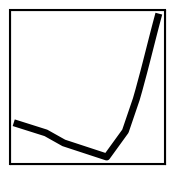

In [84]:
 #plot model
model(dataset['train_input'])
model.plot()

#prune and plot model
model = model.prune()
model.plot()

In [ ]:
print('-' * 50)
#find best fit function
mode = 'auto'  # can also do manual
#library of potential functions the model can use
lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
#for each node it calculates the correlation between the function and the output. function with highest R is chosen
model.auto_symbolic(lib=lib)

formula = model.symbolic_formula()[0][0]
ex_round(formula, 4)
print("\n Formula: ", formula)
print('-' * 50)

--------------------------------------------------
fixing (0,0,0) with 0
fixing (0,0,1) with x, r2=1.0000003576278687, c=1
fixing (0,0,2) with x, r2=1.000000238418579, c=1
fixing (0,0,3) with x, r2=1.0000004768371582, c=1
fixing (0,0,4) with x, r2=1.0000004768371582, c=1
fixing (0,0,5) with 0
fixing (0,0,6) with x, r2=1.0000003576278687, c=1
fixing (0,0,7) with x, r2=1.000000238418579, c=1
fixing (0,1,0) with 0
fixing (0,1,1) with 0
fixing (0,1,2) with 0
fixing (0,1,3) with 0
fixing (0,1,4) with 0
fixing (0,1,5) with 0
fixing (0,1,6) with x, r2=1.000000238418579, c=1
fixing (0,1,7) with 0
fixing (0,2,0) with 0
fixing (0,2,1) with x, r2=1.0000003576278687, c=1
fixing (0,2,2) with 0
fixing (0,2,3) with 0
fixing (0,2,4) with 0
fixing (0,2,5) with 0
fixing (0,2,6) with x, r2=1.0000004768371582, c=1
fixing (0,2,7) with 0
fixing (0,3,0) with 0
fixing (0,3,1) with 0
fixing (0,3,2) with 0
fixing (0,3,3) with 0
fixing (0,3,4) with 0
fixing (0,3,5) with 0
fixing (0,3,6) with 0
fixing (0,3,7) wit